# Project 2: *Nutrition Visualizer*  by Jacoba Carr


# Part 1
## Installing and importing packages:
I will be using the pandas, numpy, scipy, seaborn, and matplotlib packages for this project. From scipy I will be using the stats module.

In [ ]:
# Written by Jacoba Carr
# 2024-11-21

!pip install pandas numpy scipy seaborn matplotlib

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as stats_module
import seaborn as sns
import matplotlib.pyplot as plt

# Part 2
## Creating Classes:
Each restaurant will have a list of menu item objects within them and each menu item object will have a list of nutritional info, as created by the create_menu_list function.

In [ ]:
# Creating the Classes:

class NutritionalInfo:
  ''' Represents the nutritional information of a food item '''
  def __init__(self, calories, total_fat, saturated_fat, trans_fat, cholesterol, sodium, carbs, fiber, sugar, protein):
    self.calories = calories
    self.total_fat = total_fat
    self.saturated_fat = saturated_fat
    self.trans_fat = trans_fat
    self.cholesterol = cholesterol
    self.sodium = sodium
    self.carbs = carbs
    self.fiber = fiber
    self.sugar = sugar
    self.protein = protein

  def get(self, nutrient_name, default=np.nan):
    """Retrieve the value of a nutrient safely."""
    if hasattr(self, nutrient_name):
      return getattr(self, nutrient_name)
    else:
      return default

class MenuItem:
  ''' Represents a menu item '''
  def __init__(self, name, nutritional_info):
    self.name = name
    self.nutritional_info = nutritional_info

class Restaurant:
  ''' Represents a restaurant '''
  def __init__(self, name, menu_items):
    self.name = name
    self.menu_items = menu_items

In [ ]:
# Create a create_menu_list function:
def create_menu_list(filename):
  ''' Creates a list of restaurant objects from a pandas DataFrame '''
  # Load data from csv
  data = pd.read_csv(filename, encoding = 'ISO-8859-1', usecols = range(24), dtype = {  # I'm only using up to column 23 since everything past that would be a waste of resources
      9:str # This is just to bypass an error - we're not even looking at the data in column 9
  })
  # Create a list to store restaurant instances
  restaurants = []
  restaurant_dict = {}

  # Iterate through each row and create restraurant instances
  for _, row in data.iterrows():
    nutritional_info = NutritionalInfo(
        calories=row['Calories'],                   # While they are in order, and the init method would understand
        total_fat=row['Total_Fat'],                 # which row represents which variable, it makes it a lot easier
        saturated_fat=row['Saturated_Fat'],         # for us to see which parameter we're referring to, especially
        trans_fat=row['Trans_Fat'],                 # since this method has so many parameters.
        cholesterol=row['Cholesterol'],
        sodium=row['Sodium'],
        carbs=row['Carbohydrates'],
        fiber=row['Dietary_Fiber'],
        sugar=row['Sugar'],
        protein=row['Protein']
    )

    menu_item = MenuItem(
        name=row['Item_Name'],
        nutritional_info = nutritional_info
    )
    restaurant_name = row['Restaurant']

    # Add or update restaurant in the dictionary
    if restaurant_name not in restaurant_dict:
      restaurant_dict[restaurant_name] = Restaurant(name=restaurant_name, menu_items=[])  # Create a new Restaurant object
    restaurant_dict[restaurant_name].menu_items.append(menu_item)  # Add menu item to existing Restaurant object

    # Convert the dictionary values (Restaurant objects) to a list
    restaurants = list(restaurant_dict.values())

  return restaurants


# Part 3
## Creating the NutritionalAnalysis Class:
This class posesses two methods that go through each restaurants menu list, as created by the create_menu_list function above.

The first method runs the stats for a specified nutrient across a restaurants entire menu, cleaning the data by skipping over empty values.

The second method calculates the percentage of the ratio between a nutrient's average over a menu and average calories over the menu.

In [ ]:
# Now we create a class of nutritional analysis
class NutritionalAnalysis:
  def __init__(self, filename):
    self.restaurants = create_menu_list(filename)

  def nutrient_stats_by_restaurant(self, nutrient):
    ''' Returns a dictionary containing the stats
    of a particular nutrient for each restaurant '''
    restaurant_stats = {}  # Dictionary to store restaurant stats

    # Loop through each restaurant
    for restaurant in self.restaurants:
      restaurant_name = restaurant.name
      nutrient_values = [item.nutritional_info.get(nutrient) for item in restaurant.menu_items]
      nutrient_values = [x for x in nutrient_values if not np.isnan(x)]  # gets rid of non numbers for later calcs

      nutrient_mean = np.mean(nutrient_values) if nutrient_values else np.nan # prevents errors with empty lists
      nutrient_median = np.median(nutrient_values) if nutrient_values else np.nan
      mode_result = stats_module.mode(nutrient_values)
      nutrient_mode = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode if nutrient_values else np.nan
      nutrient_min = np.min(nutrient_values) if nutrient_values else np.nan
      nutrient_max = np.max(nutrient_values) if nutrient_values else np.nan
      nutrient_range = np.ptp(nutrient_values) if nutrient_values else np.nan
      nutrient_variance = np.var(nutrient_values) if nutrient_values else np.nan
      nutrient_std = np.std(nutrient_values) if nutrient_values else np.nan

      restaurant_stats[restaurant_name] = {
        'mean': nutrient_mean,
        'median': nutrient_median,
        'mode': nutrient_mode,
        'min': nutrient_min,
        'max': nutrient_max,
        'range': nutrient_range,
        'variance': nutrient_variance,
        'standard_deviation': nutrient_std
      }

    return restaurant_stats

  def compare_nutrients_to_calories(self, nutrient):
    ''' Returns a dictionary containing the ratio of a particular nutrient
    to calories for each restaurant '''
    restaurant_percentages = {}  # Dictionary to store restaurant percentages

    for restaurant in self.restaurants:
      restaurant_name = restaurant.name
      calories_per_item = [item.nutritional_info.get('calories') for item in restaurant.menu_items]
      calories_per_item = [x for x in calories_per_item if not np.isnan(x)]  # gets rid of non numbers for later calcs
      nutrient_values = [item.nutritional_info.get(nutrient) for item in restaurant.menu_items]
      nutrient_values = [x for x in nutrient_values if not np.isnan(x)]

      if calories_per_item and nutrient_values:
        nutrient_ratio = np.mean(nutrient_values) / np.mean(calories_per_item) * 100
      else:
        nutrient_ratio = np.nan

      restaurant_percentages[restaurant_name] = nutrient_ratio

    return restaurant_percentages

# Testing....
#analysis = NutritionalAnalysis('Annual_Data2018.csv')
#calories_stats_by_restaurant = analysis.nutrient_stats_by_restaurant('calories')

#for restaurant, stats in calories_stats_by_restaurant.items():
#  print(f"Restaurant: {restaurant} Mean Calories: {stats['mean']} Standard Deviation of Calories: {stats['standard_deviation']}")

#thing = NutritionalAnalysis('Annual_Data2018.csv')
#percentages = thing.compare_nutrients_to_calories('protein')

#for restaurant, percentage in percentages.items():
#  print(f"Restaurant: {restaurant} Percentage Ratio of Protein to Calories: {percentage}%")

# Part 4
## Creating dataframes:
The first function uses the first method from the NutritionalAnalysis class and creates a dataframe with columns for the restaurant and each stat. The result of this must then be passed through the sort function if the desired graph is one in order of the lowest to highest value of the stat being graphed.

The second dataframe uses the second method from the NutrionalAnalysis class and creates a datafram with just two columns, the restaurant and the percentage. The product is already ordered from lowest to highest.

In [ ]:
# Create a dataframe of the stat by restaurant for use in graphs
def stat_by_restaurant_dataframe(filename, nutrient):
  ''' Returns a dataframe containing the mean and standard deviation
  of a particular nutrient for each restaurant '''
  analysis = NutritionalAnalysis(filename)
  stats_by_restaurant = analysis.nutrient_stats_by_restaurant(nutrient)
  nutrient_df = pd.DataFrame.from_dict(stats_by_restaurant, orient='index')
  nutrient_df = nutrient_df.reset_index()  # Reset index to make 'restaurant' a column
  nutrient_df.columns = ['restaurant', 'mean', 'median', 'mode', 'min', 'max', 'range', 'variance', 'standard deviation'] # Rename columns for clarity
  return nutrient_df

# To sort this one, because there are different
# stats we're running you have to choose
# which you'll sort by for your graph

# So lets make a quick function for that:
def sort(dataframe, stat):
  ''' Sorts a dataframe by a particular statistic '''
  dataframe = dataframe.sort_values([stat]).reset_index(drop=True)
  return dataframe


In [ ]:
# Create a dataframe of the percentage of nutrient:calories for each restaurant
def percentage_by_restaurant_dataframe(filename, nutrient):
  ''' Returns a dataframe containing the ratio of a particular nutrient
  to calories for each restaurant, sorted by the percentage values '''
  analysis = NutritionalAnalysis(filename)
  percentages_by_restaurant = analysis.compare_nutrients_to_calories(nutrient)
  percentage_df = pd.DataFrame.from_dict(percentages_by_restaurant, orient='index')
  percentage_df = percentage_df.reset_index()  # Reset index to make 'restaurant' a column
  percentage_df.columns = ['restaurant', 'percentage'] # Rename columns for clarity
  percentage_df = percentage_df.dropna().sort_values(['percentage']).reset_index(drop=True)
  return percentage_df


# Part 5
## Creating graphs:
After creating a couple dataframes to graph, one using the first method and one using the second, I produced some test graphs just to fiddle around with. I've left the very first iteration in, that hadn't been sorted by value, just to show the base I went off of.

Then I made the create graph function, including some functions to make beautiful little titles for them.

In [ ]:
protein_df = stat_by_restaurant_dataframe('Annual_Data2018.csv', 'protein')
protein_percentage_df = percentage_by_restaurant_dataframe('Annual_Data2018.csv', 'protein')

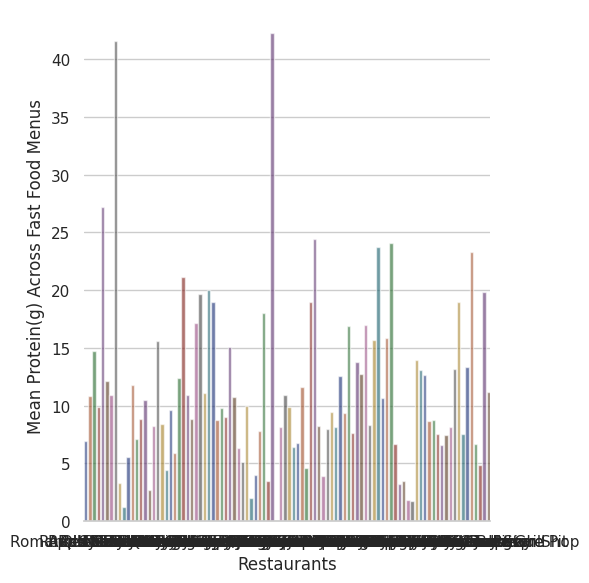

In [ ]:
# First attempt at barplot
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=protein_df, kind="bar",
    x='restaurant', y='mean', hue='restaurant',
    errorbar='sd', palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Restaurants", "Mean Protein(g) Across Fast Food Menus")

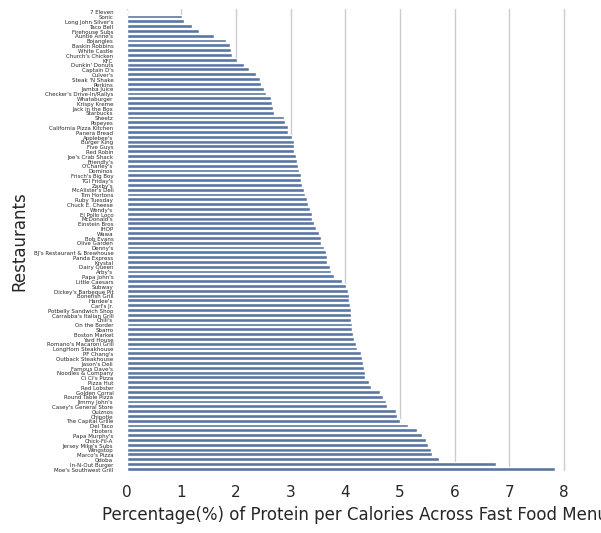

In [ ]:
# A much more pleasant graph:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x="percentage", y="restaurant", data=protein_percentage_df)

# Change fontsize for the restaurants
plt.tick_params(axis='y', which='major', labelsize=4)

# Add a legend and informative axis label
ax.set(xlim=(0, 8.5), ylabel="Restaurants",
       xlabel="Percentage(%) of Protein per Calories Across Fast Food Menus")
sns.despine(left=True, bottom=True)


In [ ]:
def units(nutrient):
  ''' Appends the unit a nutrient is measured in (in parentheses) '''
  if nutrient == 'calories':
    return 'Calories'
  elif nutrient == 'total_fat':
    return 'Total Fat'+'(g)'
  elif nutrient == 'saturated_fat':
    return 'Saturated Fat'+'(g)'
  elif nutrient == 'trans_fat':
    return 'Trans Fat'+'(g)'
  elif nutrient == 'cholesterol':
    return 'Cholesterol'+'(mg)'
  elif nutrient == 'sodium':
    return 'Sodium'+'(mg)'
  elif nutrient == 'carbs':
    return 'Carbohydrates'+'(g)'
  elif nutrient == 'fiber':
    return 'Dietary Fiber'+'(g)'
  elif nutrient == 'sugar':
    return 'Sugar'+'(g)'
  elif nutrient == 'protein':
    return 'Protein'+'(g)'

def create_x_title(x, nutrient):
    """Creates an appropriate x-axis title.
    :param x: whatever stat the user has chosen to graph"""
    if x == 'percentage':
        return f'Percentage(%) of {units(nutrient)} to Calories'
    elif x == 'range' or x == 'variance' or x == 'standard deviation':
        return f'{x.capitalize()} of {units(nutrient)}'
    else:
        return f'{x.capitalize()} {units(nutrient)}'

def create_graph_title(x, nutrient):
  ''' Creates an appropriate graph title
  :param x: whatever stat the user has chosen to graph'''
  return create_x_title(x, nutrient) + ' Across Fast Food Menus'

def create_graph(dataframe, x, nutrient):
  ''' Creates a barplot of a dataframe
  :param x: whatever stat the user has chosen to graph'''
  max_x = max(dataframe[x])
  x_limit = max_x + 0.5 if max_x < 100 else max_x + 10

  sns.set_theme(style="whitegrid")
  f, ax = plt.subplots(figsize=(6, 6))
  sns.set_color_codes("pastel")
  sns.barplot(x=x, y="restaurant", data=dataframe)
  plt.tick_params(axis='y', which='major', labelsize=4)
  ax.set(xlim=(0, x_limit), ylabel="Restaurants",
       xlabel=create_x_title(x, nutrient))
  ax.set_title(create_graph_title(x, nutrient), fontsize=12)
  sns.despine(left=True, bottom=True)

# Part 6 - Putting it all together
## Creating the Main function:
It asks the user to choose whether they'd like to use the first method, graphing by the nutrient itself, or the second, comparing to calories.

Then, it gives the user the list of the nutrients my program can evaluate and asks them which they'd like to see.

At each of these steps it uses the get_valid_input helper function to ensure that the user doesn't make a typo or inputs something not on the list.

It then graphs the relationship between the option they chose and the restaurants in a bar plot, sorted by value.

In [ ]:
# Creating the main function
def get_valid_input(prompt, valid_options):
  """
  Prompts the user for input and returns a valid input.
  :param prompt: The question or information to display to the user.
  :param valid_options: A set of valid inputs.
  """
  while True:
    user_input = input(prompt).strip().lower()
    if user_input in valid_options:
      return user_input
    else:
      print(f'Invalid input. Please enter one of the following: {", ".join(valid_options)}.')

def main():
  '''
  Gets input from the user as to which way to process the data
  and which nutrient to choose, then graphs the relationship
  between their choice and restaurants
  '''
  valid_stats = {'mean', 'median', 'mode', 'min', 'max', 'range', 'variance', 'standard deviation'}
  valid_nutrients = {'calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol',
                      'sodium', 'carbs', 'fiber', 'sugar', 'protein'}

  # Get the graph type
  graph_type_prompt = ('Would you like to graph a stat on a nutrient by restaurant, '
                        'or the percentage of that nutrient to calories by restaurant? (stat/percentage): ')
  graph_type = get_valid_input(graph_type_prompt, {'stat', 'percentage'})

  if graph_type == 'stat':
    # Get the stat
    stat_prompt = ('The stats to choose from are mean, median, mode, min, max, range, variance, '
                    'and standard deviation.\nWhich stat would you like to graph? ')
    stat = get_valid_input(stat_prompt, valid_stats)

    # Get the nutrient
    nutrient_prompt = ('The nutrients to choose from are calories, total_fat, saturated_fat, trans_fat, '
                        'cholesterol, sodium, carbs, fiber, sugar, and protein.\nWhich nutrient would you like to graph? ')
    nutrient = get_valid_input(nutrient_prompt, valid_nutrients)

    # Generate and sort the DataFrame
    nutrient_df = stat_by_restaurant_dataframe('Annual_Data2018.csv', nutrient)
    nutrient_df = sort(nutrient_df, stat)
    create_graph(nutrient_df, stat, nutrient)

  elif graph_type == 'percentage':
    nutrient_prompt = ('The nutrients to choose from are total_fat, saturated_fat, trans_fat, cholesterol, sodium, '
                        'carbs, fiber, sugar, and protein.\nWhich nutrient would you like to graph? ')
    nutrient = get_valid_input(nutrient_prompt, valid_nutrients - {'calories'})

    percentage_df = percentage_by_restaurant_dataframe('Annual_Data2018.csv', nutrient)
    create_graph(percentage_df, 'percentage', nutrient)


Would you like to graph a stat on a nutrient by restaurant, or the percentage of that nutrient to calories by restaurant? (stat/percentage): stat
The stats to choose from are mean, median, mode, min, max, range, variance, and standard deviation.
Which stat would you like to graph? variance
The nutrients to choose from are calories, total_fat, saturated_fat, trans_fat, cholesterol, sodium, carbs, fiber, sugar, and protein.
Which nutrient would you like to graph? sugar


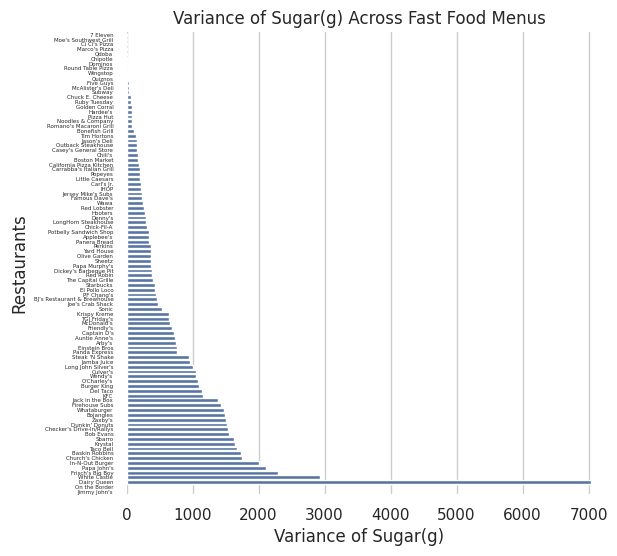

In [ ]:
main()

# Data Citation
Cleveland, Lauren, 2022, "MenuStat Annual Data", https://doi.org/10.7910/DVN/K4NYTR, Harvard Dataverse, V1; Annual_Data2018.tab [fileName], UNF:6:LElXCW7NmqvveS3lbIkRoQ== [fileUNF]